In [1]:
# Part 1: Reading in the Customer Reviews

In [2]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline


In [3]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
# read yelp.csv into a DataFrame
bankreviews = pd.read_excel('C:\\Data_Science\\Certifications\\AnalytixLabs\Data Science in Python\\Final Projects\\New Projects_TextMining\\5. Bank Reviews-Complaints Analysis\\BankReviews.xlsx')

In [5]:
bankreviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [6]:
df = bankreviews
df.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


### Basic Exploratory Analysis

In [7]:
import re

In [8]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Reviews"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Reviews"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["Reviews"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [9]:
df.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,15,0,0,0,"{'you!': 1, 'Thank': 1, 'our': 1, 'professiona...",8,3,1,1,3
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,21,0,0,0,"{'the': 2, 'our': 1, 'us': 1, 'very': 1, 'you'...",7,3,4,2,4
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,73,0,0,1,"{'We': 2, 'option': 1, 'the': 3, 'our': 1, 'pr...",24,10,5,8,8
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,101,0,0,1,"{'have': 1, 'We': 2, 'option': 1, 'the': 6, 'o...",30,17,8,7,11
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,53,0,0,1,"{'the': 4, 'responsiveness': 1, 'about': 1, 'v...",16,9,4,4,8


In [10]:
bankreviews.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

### Split the data into train & Test

In [11]:
# create a new DataFrame that only contains the 5-star and 1-star reviews

# define X and y
X = bankreviews.Reviews
y = bankreviews.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [12]:
bankreviews.shape

(505, 27)

In [13]:
bankreviews.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,15,0,0,0,"{'you!': 1, 'Thank': 1, 'our': 1, 'professiona...",8,3,1,1,3
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,21,0,0,0,"{'the': 2, 'our': 1, 'us': 1, 'very': 1, 'you'...",7,3,4,2,4
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,73,0,0,1,"{'We': 2, 'option': 1, 'the': 3, 'our': 1, 'pr...",24,10,5,8,8
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,101,0,0,1,"{'have': 1, 'We': 2, 'option': 1, 'the': 6, 'o...",30,17,8,7,11
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,53,0,0,1,"{'the': 4, 'responsiveness': 1, 'about': 1, 'v...",16,9,4,4,8


### Creating user defined functions for clean the text and pre-process the data

In [14]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [15]:
stop = set(nltk.corpus.stopwords.words('english'))

In [16]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

### Test the functions on the sample data


In [17]:
s = 'Analytixlabs is from Bangalore, it has offices in Gurgoan, KL. It was started in 4Years back'

In [18]:
clean_text(s)

'analytixlabs is from bangalore it has offices in gurgoan kl it was started in years back'

In [19]:
print(stop)

{'ll', 'have', "you'd", 'the', 'so', 'ain', 'more', 'yourself', 'over', 'whom', 'was', 'for', 'it', 'when', "you'll", "she's", 'while', 'a', 'didn', 'what', 'during', "you're", 'itself', 'as', "aren't", "couldn't", 'd', 'out', 'ours', "mightn't", 'her', 'there', 'shouldn', 'then', 'that', 'too', 'me', 'why', 'at', 'don', 'hers', 'from', 'can', 'on', 'yourselves', 'y', 'or', 'further', "won't", 'than', 'hadn', 'very', 'off', 'been', 'his', 'isn', 'weren', "shouldn't", 'will', 'such', "don't", 'mightn', 'each', "haven't", 'mustn', 'your', 'where', 'shan', 'any', 'we', 'same', 'through', 'they', 'some', "shan't", 'of', 'are', 'by', 'to', 'between', "wouldn't", 'above', 'here', "wasn't", 'who', 'having', 'has', "mustn't", 'she', 'own', 'our', 'he', 'theirs', 'before', "didn't", 'these', "needn't", 'o', 'an', 'i', 'now', 'wasn', 'him', 'herself', 'both', 'below', 'ourselves', 'no', 'had', 'doesn', 'am', 'wouldn', 'being', 'just', 'needn', 'won', 'myself', 'how', 'their', 't', "that'll", 'in

In [20]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [21]:
s= 'Analytics is really doing good'

In [22]:
stemmer_func('really')

'realli'

In [23]:
s.split()

['Analytics', 'is', 'really', 'doing', 'good']

In [24]:
### Applying these functions on the BankReviews data (both training & Testing)

In [25]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [26]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

### Vectorization (Count, Tfidf, Hashing)

In [27]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)


In [28]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=800, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

### View the document term matrix

In [29]:
dtm=xtrain_count.toarray()

In [30]:
dtm

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
count_vect.get_feature_names()

['aaron',
 'able',
 'absolutely',
 'accept',
 'accommodating',
 'account',
 'accurate',
 'across',
 'actual',
 'adam',
 'additional',
 'advice',
 'agent',
 'agreed',
 'alex',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'amount',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraiser',
 'appreciate',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspects',
 'attention',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'balance',
 'bank',
 'banks',
 'barrett',
 'based',
 'became',
 'beginning',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'brent',
 'broker',
 'business',
 'buy',
 'buyer',
 'buyers',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calls',
 'calm',
 'came',
 'cannot',
 'cant',
 'capital',
 'care',
 'causing',
 'certainly',
 'change',
 'changed',
 'check',
 'chose',
 'chris',
 'circumstances',
 'clear',
 'cli

In [32]:
dtm1=pd.DataFrame(dtm)

In [33]:
dtm1.columns=count_vect.get_feature_names()

In [34]:
dtm1.head()

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorization (count, tfidf) for both train & test

In [35]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [36]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [37]:
dtm2.head(10)

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0.0,0.0,0.000000,0.133259,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.123737,0.0,0.0,0.0,0.0,0.096250,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.194406,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.130702,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.121363,0.0,0.0,0.0,0.0,0.094403,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.084774,0.175643,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.256938,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.068074,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.228774,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [38]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(df['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [39]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(df['Reviews'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Models as features (optional)

In [40]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [41]:
# view the topic models
n_top_words = 50
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['read surprises expected conversations dallas closing smooth dont three satisfied funded contact immediately loan day refi refinancing triumph guy calls industry last check lender best weeks interest better ve i let failed nasb june decided unprofessional personal continued process fantastic review things im could different date impressed star experience conversation',
 'customer great service helpful best get kory always everything loan available extremely companies use time t extra officer complicated possible far call anyone ever purchase thanks worked none aaron help made definitely could called talk home different professional entire second dealing forward rate nothing go process two hard calm several',
 'friendly efficient informed staff throughout kept well work great process seemed job fred respond time give day based super loan high awesome costs options forward explaining closed said calls contract closing would broker one spent stayed helpful provided information lending kn

In [42]:
frequency_words_wo_stop= {}
for data in bankreviews['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                



In [43]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [44]:
### Bank Reviews - wordcloud

In [45]:
from wordcloud import WordCloud ,STOPWORDS

In [46]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,100))
plt.imshow(wordcloud)

In [47]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [48]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)



# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)



NB  for L1, Count Vectors:  0.889763779527559
NB  for L1, WordLevel TF-IDF:  0.952755905511811
NB  for L1, N-Gram Vectors:  0.8188976377952756
NB for L1, CharLevel Vectors:  0.8031496062992126


In [49]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8661417322834646
LR  for L1, WordLevel TF-IDF:  0.9448818897637795
LR  for L1, N-Gram Vectors:  0.8582677165354331
LR for L1, CharLevel Vectors:  0.8031496062992126


In [50]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.952755905511811
SVC  for L1, WordLevel TF-IDF:  0.968503937007874
SVC  for L1, N-Gram Vectors:  0.9606299212598425
SVC for L1, CharLevel Vectors:  0.889763779527559


### Adding Features to a Document-Term Matrix

In [51]:
# create a DataFrame that only contains the 5-star and 1-star reviews

# define X and y
feature_cols = ['Reviews']
X = bankreviews[feature_cols]
y = bankreviews.Stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.Reviews)
X_test_dtm = vect.transform(X_test.Reviews)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape

(378, 2438)
(127, 2438)


(378, 0)

In [53]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Reviews', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Reviews', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(127, 2438)

In [54]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.968503937007874


In [55]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

0.968503937007874


### Tokenization

In [72]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [73]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [74]:
X_test_dtm.shape

(1, 1)

In [59]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(1, 1)

In [60]:
# last 50 features
print(vect.get_feature_names()[-50:])

['reviews']


In [61]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [62]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [63]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(1, 1)

In [64]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [65]:
# last 50 features
print(vect.get_feature_names()[-50:])

['reviews']


In [66]:
#Calculate tf-idf:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

#Calculate cosine similarity:
cosine=(tfidf * tfidf.T).A
print(cosine)

[[1.         0.82384531 0.28730789 0.20464882]
 [0.82384531 1.         0.16511247 0.1679379 ]
 [0.28730789 0.16511247 1.         0.89268279]
 [0.20464882 0.1679379  0.89268279 1.        ]]


In [67]:
# Predicting the star rating:

In [68]:
X_train_dtm.shape

(1, 1)

In [69]:
X_test_dtm

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [70]:
# use Naive Bayes to predict the star rating
nb = naive_bayes.MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

ValueError: Found input variables with inconsistent numbers of samples: [1, 378]

In [ ]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

In [77]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = naive_bayes.MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [78]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  1


ValueError: Found input variables with inconsistent numbers of samples: [1, 378]

### Stopword Removal

In [ ]:
vect

In [79]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  1


ValueError: Found input variables with inconsistent numbers of samples: [1, 378]

### Part 5: Introduction to TextBlob

In [80]:
# TextBlob: "Simplified Text Processing"

In [84]:
# print the first review
print(bankreviews.Reviews[0])

Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!


In [86]:
# save it as a TextBlob object
review = TextBlob(bankreviews.Reviews[0])

In [87]:
print(dir(review))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'sentiment_assessments', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'tra

In [88]:
print(review.ngrams(2))

[WordList(['Great', 'job']), WordList(['job', 'Wyndham']), WordList(['Wyndham', 'Capital']), WordList(['Capital', 'Each']), WordList(['Each', 'person']), WordList(['person', 'was']), WordList(['was', 'professional']), WordList(['professional', 'and']), WordList(['and', 'helped']), WordList(['helped', 'us']), WordList(['us', 'move']), WordList(['move', 'through']), WordList(['through', 'our']), WordList(['our', 'refinance']), WordList(['refinance', 'process']), WordList(['process', 'smoothly']), WordList(['smoothly', 'Thank']), WordList(['Thank', 'you'])]


In [89]:
review.sentiment

Sentiment(polarity=0.5333333333333333, subjectivity=0.45)

In [90]:
# list the words
review.words

WordList(['Great', 'job', 'Wyndham', 'Capital', 'Each', 'person', 'was', 'professional', 'and', 'helped', 'us', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'Thank', 'you'])

In [91]:
# list the sentences
review.sentences

[Sentence("Great job, Wyndham Capital!"),
 Sentence("Each person was professional and helped us move through our refinance process smoothly."),
 Sentence("Thank you!")]

In [92]:
# some string methods are available
review.lower()

TextBlob("great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you!")

In [93]:
review.ngrams(n=2)

[WordList(['Great', 'job']),
 WordList(['job', 'Wyndham']),
 WordList(['Wyndham', 'Capital']),
 WordList(['Capital', 'Each']),
 WordList(['Each', 'person']),
 WordList(['person', 'was']),
 WordList(['was', 'professional']),
 WordList(['professional', 'and']),
 WordList(['and', 'helped']),
 WordList(['helped', 'us']),
 WordList(['us', 'move']),
 WordList(['move', 'through']),
 WordList(['through', 'our']),
 WordList(['our', 'refinance']),
 WordList(['refinance', 'process']),
 WordList(['process', 'smoothly']),
 WordList(['smoothly', 'Thank']),
 WordList(['Thank', 'you'])]

### Part 6: Stemming and Lemmatization

In [94]:
# initialize stemmer
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stemmer

In [95]:
review.words

WordList(['Great', 'job', 'Wyndham', 'Capital', 'Each', 'person', 'was', 'professional', 'and', 'helped', 'us', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'Thank', 'you'])

In [96]:
# stem each word
print([stemmer.stem(word) for word in review.words])

['great', 'job', 'wyndham', 'capit', 'each', 'person', 'was', 'profession', 'and', 'help', 'us', 'move', 'through', 'our', 'refin', 'process', 'smooth', 'thank', 'you']


In [ ]:
# Lemmatization

# What: Derive the canonical form ('lemma') of a word
# Why: Can be better than stemming
# Notes: Uses a dictionary-based approach (slower than stemming)

In [97]:
review.words

WordList(['Great', 'job', 'Wyndham', 'Capital', 'Each', 'person', 'was', 'professional', 'and', 'helped', 'us', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'Thank', 'you'])

In [98]:
# assume every word is a noun
print([word.lemmatize() for word in review.words])

['Great', 'job', 'Wyndham', 'Capital', 'Each', 'person', 'wa', 'professional', 'and', 'helped', 'u', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'Thank', 'you']


In [99]:
# assume every word is a verb
print([word.lemmatize(pos='v') for word in review.words])

['Great', 'job', 'Wyndham', 'Capital', 'Each', 'person', 'be', 'professional', 'and', 'help', 'us', 'move', 'through', 'our', 'refinance', 'process', 'smoothly', 'Thank', 'you']


In [100]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    #text = unicode(text, 'utf-8').lower()
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [101]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  1


ValueError: Found input variables with inconsistent numbers of samples: [1, 378]

In [102]:
# last 50 features
print(vect.get_feature_names()[-50:])

['review']


### Term Frequency-Inverse Document Frequency (TF-IDF)

In [103]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [104]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [105]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [106]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [107]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Part 8: Using TF-IDF to Summarize a Yelp Review

In [110]:
TfidfVectorizer?

In [112]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(bankreviews.Reviews)
features = vect.get_feature_names()
dtm.shape

(505, 2430)

In [116]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(bankreviews))
        review_text = bankreviews.Reviews[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
  
    # print the review
    print('\n' + review_text)

In [117]:
summarize()

TOP SCORING WORDS:
tom
knowledable
hearing
referred
similar


Tom was a pleasure to work with and really took the time to answer all of our questions. He always answered his phone when we called and went above and beyond to make sure we had a good experience. I have since referred three friends to him who all had similar experiences. Tom is very knowledable and is the best in his industry. You’ll be hearing from us again, Tom! Thank you for everything.... Read More
        


### Part 9: Sentiment Analysis

In [118]:
print(review)

Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!


In [119]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.5333333333333333

In [121]:
# understanding the apply method
bankreviews['length'] = bankreviews.Reviews.apply(len)
bankreviews.head(1)

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,length
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.3,4,...,0,0,0,"{'you!': 1, 'Thank': 1, 'our': 1, 'professiona...",8,3,1,1,3,126


In [122]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [123]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
bankreviews['sentiment'] = bankreviews.Reviews.apply(detect_sentiment)

In [124]:
bankreviews.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,length,sentiment
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,0,0,"{'you!': 1, 'Thank': 1, 'our': 1, 'professiona...",8,3,1,1,3,126,0.533333
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,0,0,"{'the': 2, 'our': 1, 'us': 1, 'very': 1, 'you'...",7,3,4,2,4,159,0.453333
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,0,1,"{'We': 2, 'option': 1, 'the': 3, 'our': 1, 'pr...",24,10,5,8,8,462,-0.033231
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,0,1,"{'have': 1, 'We': 2, 'option': 1, 'the': 6, 'o...",30,17,8,7,11,605,0.093740
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,0,1,"{'the': 4, 'responsiveness': 1, 'about': 1, 'v...",16,9,4,4,8,341,0.125000


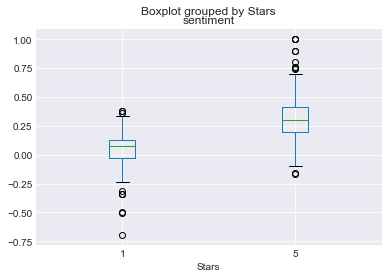

In [125]:
# box plot of sentiment grouped by stars
bankreviews.boxplot(column='sentiment', by='Stars')

In [126]:
# reviews with most positive sentiment
bankreviews[bankreviews.sentiment == 1].Reviews.head()

258    \r\nExcellent customer service - had a great e...
308         \r\nA great lender to work with!\r\n        
334    \r\nthis man is amazing!!!   i said it all in ...
Name: Reviews, dtype: object

In [128]:
# reviews with most negative sentiment
bankreviews[bankreviews.sentiment == -1].Reviews.head()

Series([], Name: Reviews, dtype: object)

In [129]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [131]:
# negative sentiment in a 5-star review
print(bankreviews[(bankreviews.Stars == 5) & (bankreviews.sentiment < -0.3)].Reviews)

Series([], Name: Reviews, dtype: object)


In [132]:
# positive sentiment in a 1-star review
print(bankreviews[(bankreviews.Stars == 1) & (bankreviews.sentiment > 0.5)].Reviews )

Series([], Name: Reviews, dtype: object)


In [133]:
# reset the column display width
pd.reset_option('max_colwidth')

### Adding Features to a Document-Term Matrix

In [136]:
# create a DataFrame that only contains the 5-star and 1-star reviews

# define X and y
feature_cols = ['Stars','Reviews']
X = bankreviews[feature_cols]
y = bankreviews.Stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [138]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.Reviews)
X_test_dtm = vect.transform(X_test.Reviews)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(378, 2438)
(127, 2438)


In [139]:
# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape

(378, 1)

In [140]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Reviews', axis=1).astype(float))
extra.shape

(378, 1)

In [141]:
# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(378, 2439)

In [142]:
# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Reviews', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(127, 2439)

In [143]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.968503937007874


In [144]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

1.0


### Fun TextBlob Features

In [147]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [150]:
s="this is beca"

In [151]:
TextBlob(s).correct()

TextBlob("this is beck")

In [152]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [153]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [154]:
# language identification
TextBlob('Hola amigos').detect_language()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>